Acquisition and Analysis of Neural Data 

Exercise 01

Bramantyo Ibrahim Supriyatno

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
max_t = 4
del_t = 1e-4

In [3]:
def get_gaussian(max_t, sr, sigma):
    t = np.arange(-max_t*0.5, max_t*0.5, step =1/sr)
    g_kernel = np.exp(-(t*t)/(2 * (sigma**2)))
    return g_kernel/(np.sqrt(2*np.pi)*sigma)

def get_alpha_function(max_t, sr, one_alpha):
    t = np.arange(-max_t*0.5, max_t*0.5, step =1/sr)
    alpha = 1./one_alpha
    w = alpha*alpha*t * np.exp(-alpha*t)
    w = np.clip(w, a_min=0, a_max=None)
    return w

# 1. Firing Rate Estimation and Convolution

## (a)

In [4]:
spike1 = np.loadtxt('ExampleSpikeTimes1.dat')/1000

In [5]:
def plot_spike(spike_arr, max_t, del_t):
    
    sr = int(1./del_t)
    t = np.arange(0, max_t, step=del_t)

    fig, ax = plt.subplots(13, 1, sharex=True, figsize=(14,52))
    
    ax_idx = 0
    ax[ax_idx].eventplot(spike_arr, lineoffsets=0.5)
    ax[ax_idx].set_title('Spike Train Plot')

    ax[ax_idx].set_xlabel('Time (S)')
    ax[ax_idx].set_ylabel('Spike')
    ax[ax_idx].set_xlim(0, max_t)
    ax[ax_idx].set_ylim(-0.1, 1.1)

    ax_idx += 1 

    del_ts = [20e-3, 50e-3, 150e-3]
    for del_t in del_ts:
        bins = np.arange(0, max_t, del_t)
        ax[ax_idx].hist(spike_arr, bins, weights=np.full(spike_arr.shape, 1/del_t))

        ax[ax_idx].set_title('Histogram Width: {} mS'.format(str(del_t*1000)))

        ax[ax_idx].set_xlabel('Time (S)')
        ax[ax_idx].set_ylabel('Spike Rate (Hz)')
        ax[ax_idx].set_xlim(0, max_t)
        ax_idx += 1
        #plt.show()

    spike_idx = np.array(spike_arr * sr, dtype=int)
    spike_samples = np.zeros(int(max_t * sr))
    spike_samples[spike_idx] = 1

    kernel_del_t = [20e-3, 50e-3, 150e-3]
    for kdel_t in kernel_del_t:
        rect_kernel =  np.full(int(kdel_t*sr), 1./kdel_t)
        rect_convolved = np.convolve(spike_samples, rect_kernel, mode='same')
        ax[ax_idx].plot(t, rect_convolved)
        ax[ax_idx].set_title(' Rectangular Kernel with Width: {} mS'.format(str(kdel_t*1000)))

        ax[ax_idx].set_xlabel('Time (S)')
        ax[ax_idx].set_ylabel('Spike Rate (Hz)')
        ax[ax_idx].set_xlim(0, max_t)
        ax_idx += 1

    kernel_del_t = [10e-3, 20e-3, 50e-3]
    for kdel_t in kernel_del_t:
        gaus_kernel =  get_gaussian(max_t, sr, kdel_t)
        gaus_convolved = np.convolve(spike_samples, gaus_kernel, mode='same')
        ax[ax_idx].plot(t, gaus_convolved)
        ax[ax_idx].set_title('Gaussian Kernel with Sigma: {} mS'.format(str(kdel_t*1000)))

        ax[ax_idx].set_xlabel('Time (S)')
        ax[ax_idx].set_ylabel('Spike Rate (Hz)')
        ax[ax_idx].set_xlim(0, max_t)
        ax_idx += 1
    

    for kdel_t in kernel_del_t:
        alpha_kernel =  get_alpha_function(max_t, sr, kdel_t)
        alpha_convolved = np.convolve(spike_samples, alpha_kernel, mode='same')
        ax[ax_idx].plot(t, alpha_convolved)
        ax[ax_idx].set_title('Alpha Function Kernel with 1/alpha: {} mS'.format(str(kdel_t*1000)))

        ax[ax_idx].set_xlabel('Time (S)')
        ax[ax_idx].set_ylabel('Spike Rate (Hz)')
        ax[ax_idx].set_xlim(0, max_t)
        ax_idx += 1
    
    plt.show()

    r = np.sum(spike_arr) / max_t   
    print('spike count rate: {} spikes/second'.format(r))

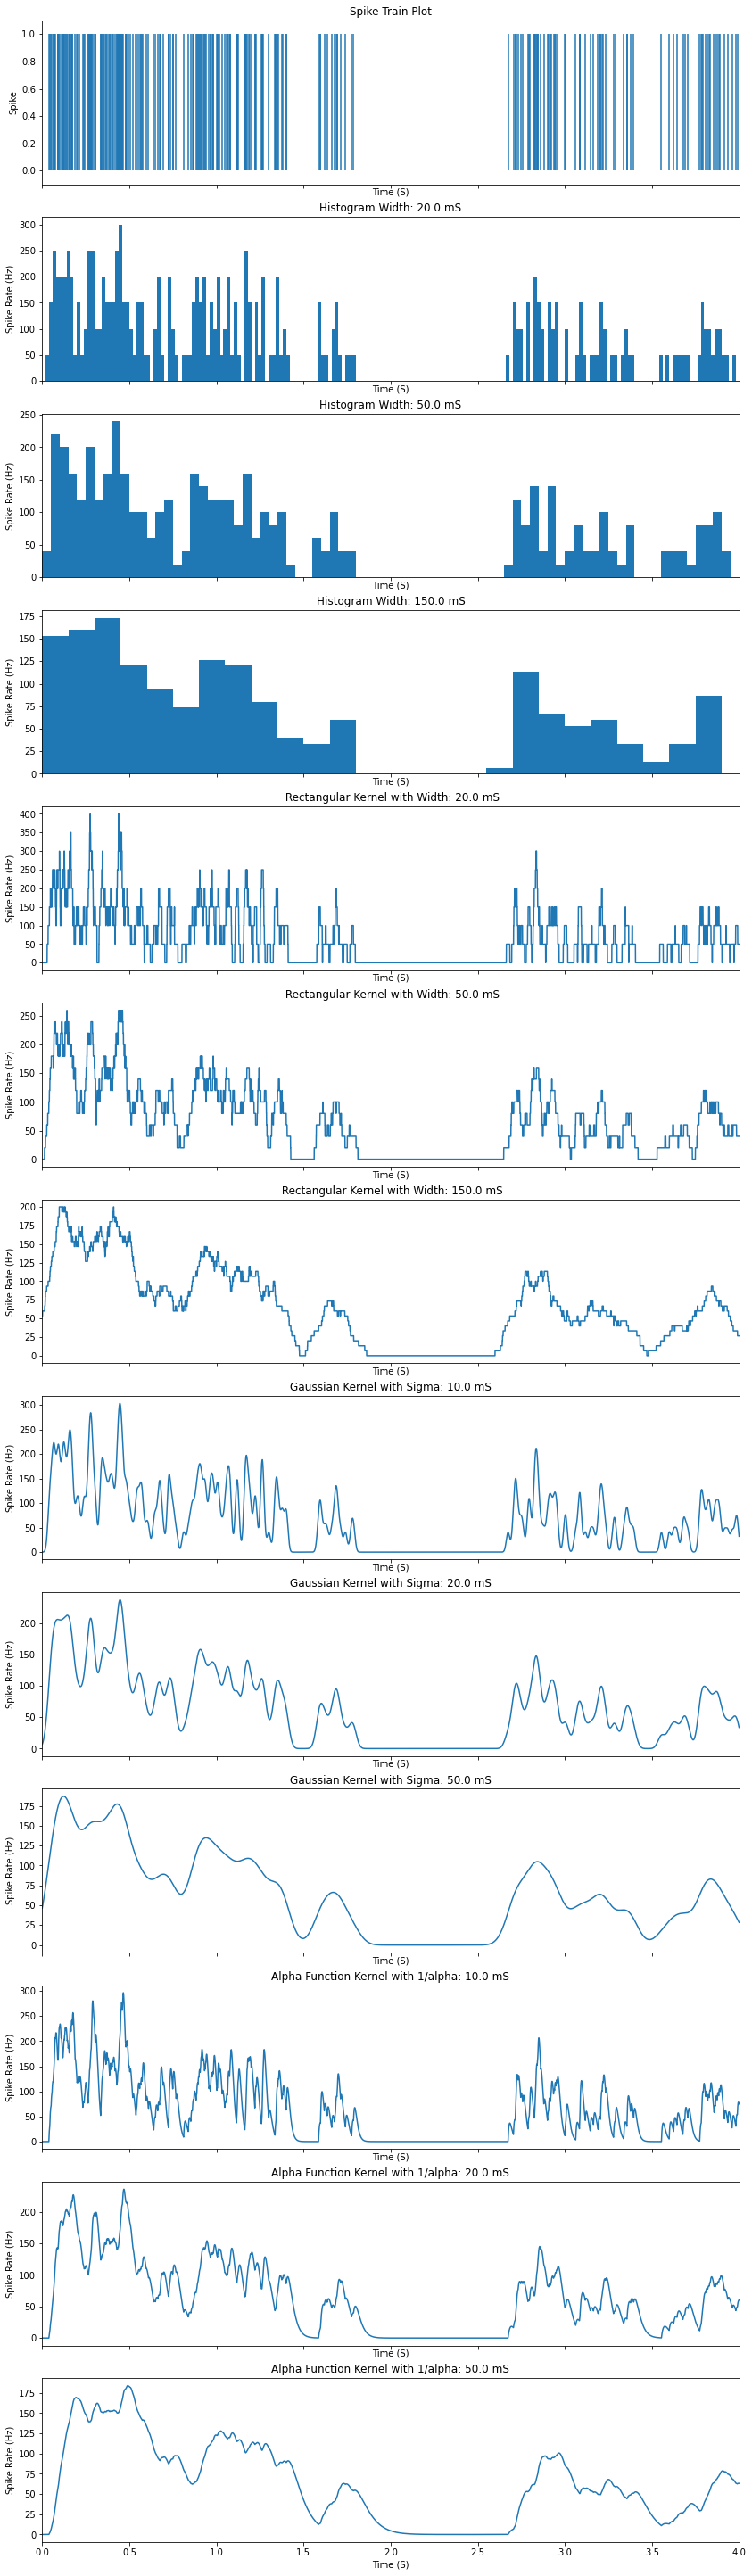

spike count rate: 94.1379 spikes/second


In [6]:
plot_spike(spike1, max_t, del_t)

Using non-causal kernels such as gaussian or rectangle would take future or incoming spikes into the convolution. This is biologically unrealistic. On the other hand, causal kernel will only use past spikes in the calculation hence more realistic

# 2 (a)

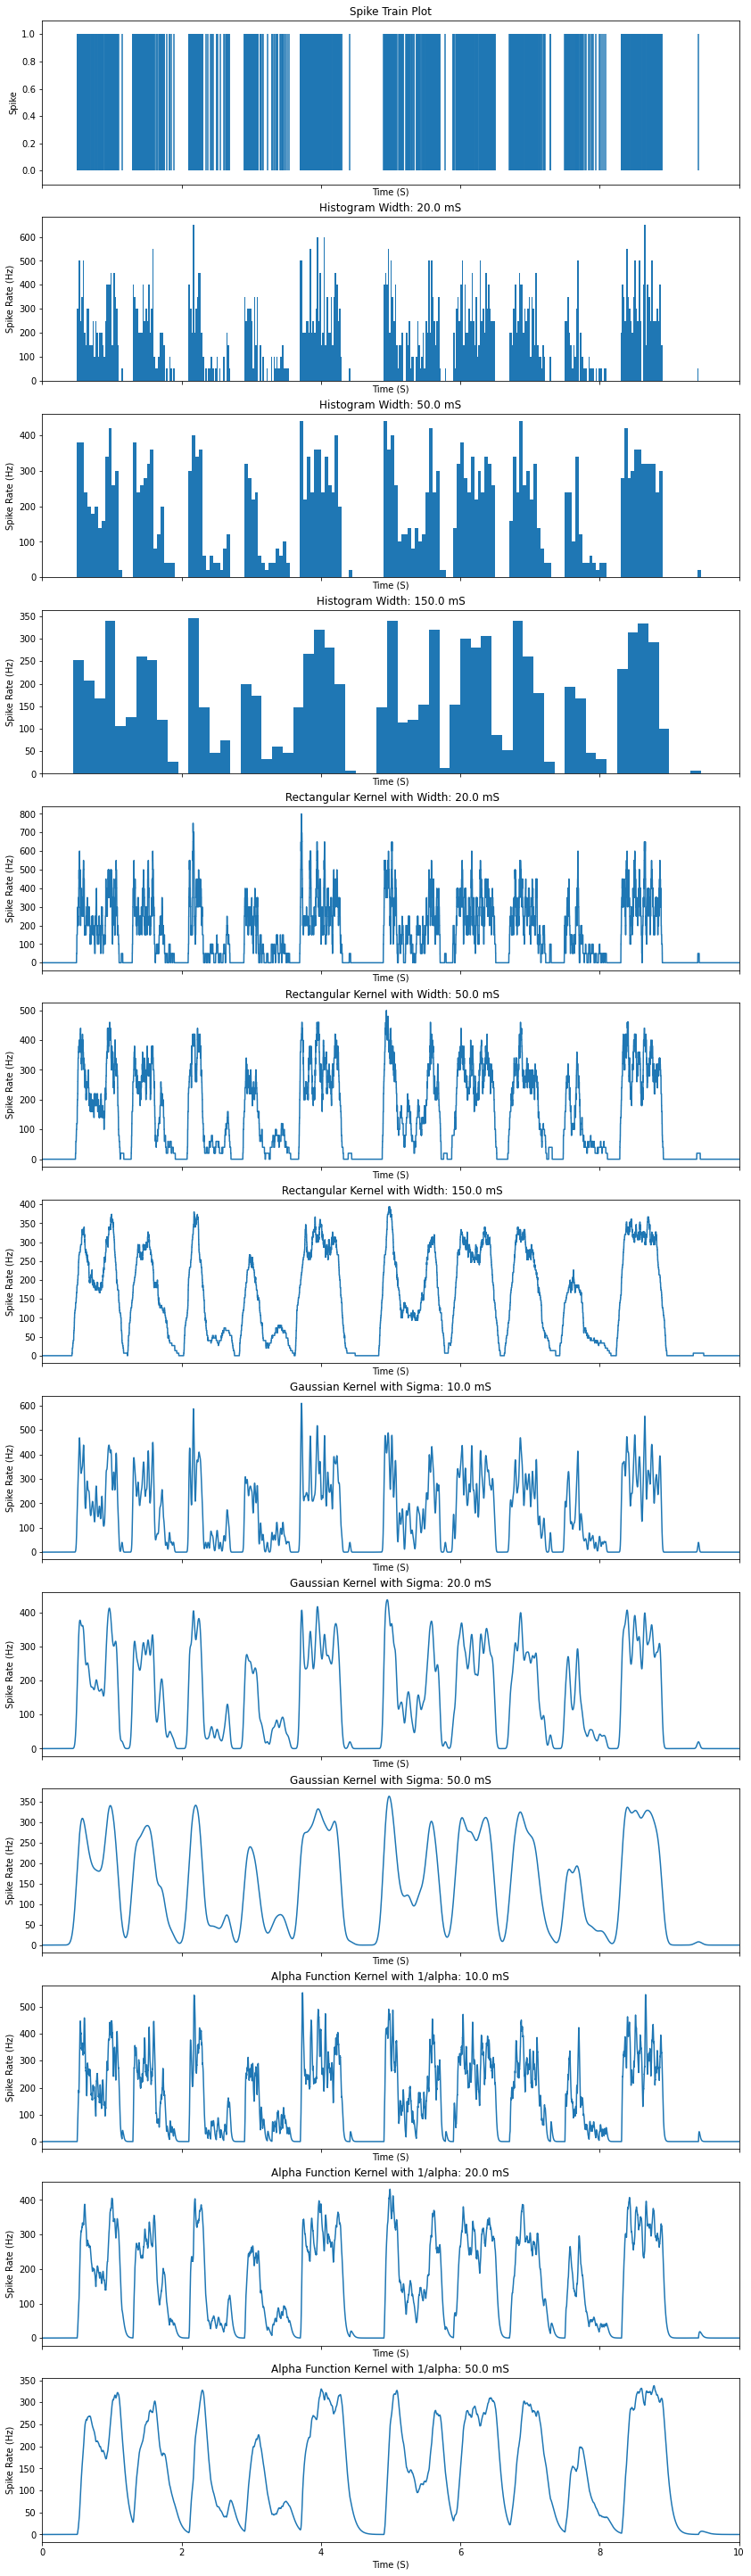

spike count rate: 654.35144 spikes/second


In [10]:
max_t = 10
del_t = 0.1e-3
spike2 = np.loadtxt('ExampleSpikeTimes2.dat')/1000
plot_spike(spike2, max_t, del_t)